In [1]:
# Necessary imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sns
%matplotlib inline

In [2]:
# Read and preview the dataset
f = open('../data/datasets/automobile_data.csv')
data = pd.read_csv(f)
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [3]:
# Check Data types of all fields
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    205 non-null object
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression-ratio    205 non-null float64
horsepower           205 non-nul

In [4]:
# Check Descriptive Stats
data.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [5]:
# Find out if there are any null fields
data.isnull().values.any()

False

In [6]:
# Which manufacturer/make makes highest no. of cars?
data.make.value_counts()[:1]

toyota    32
Name: make, dtype: int64

In [7]:
# Which is more preferred fuel type
data['fuel-type'].value_counts()[:1]


gas    185
Name: fuel-type, dtype: int64

True     201
False      4
Name: price, dtype: int64
9      ?
44     ?
45     ?
129    ?
Name: price, dtype: object
Automobile dataset size:  205
Clean dataset size:  201


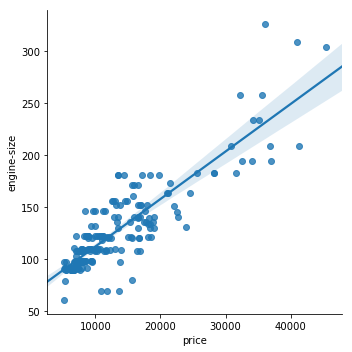

In [8]:
# Correlation between engine size and Price
print data['price'].str.isnumeric().value_counts()
print data['price'].loc[data['price'].str.isnumeric() == False]

prices2 = data['price'].loc[data['price'] != '?']
print 'Automobile dataset size: ', len(data)
print 'Clean dataset size: ', len(prices2)
data['price'] = pd.to_numeric(data['price'], downcast='float', errors='coerce')
sns.lmplot(x='price', y='engine-size', data=data[['engine-size', 'price']])

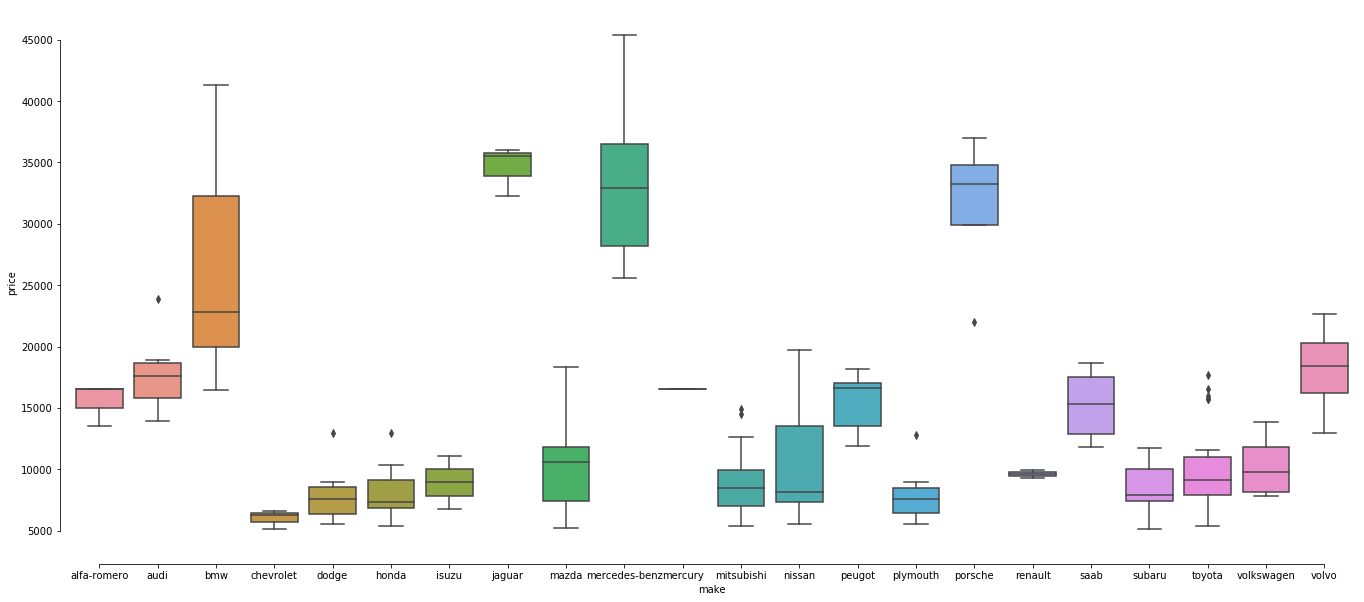

In [9]:
# Make a box plot of Price and answer the following
# Most expensive car manufacturer, Manufacturer for affordable/less expensive cars
# sns.set(color_codes=True)
plt.rcParams["figure.figsize"]=(23,10)
sns.boxplot(x='make', y='price', data=data,dodge=True)
sns.despine(offset=10, trim=True)

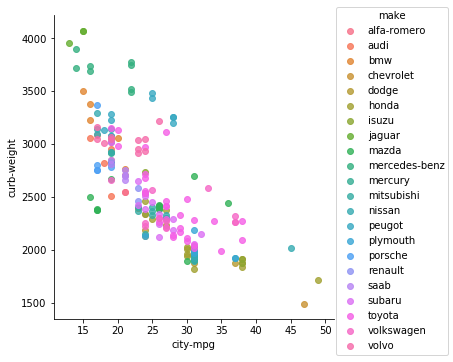

In [10]:
# How is curb weight related to highway mpg and city mpg for different car makers
sns.lmplot('city-mpg', 'curb-weight', data, hue='make',fit_reg=False)

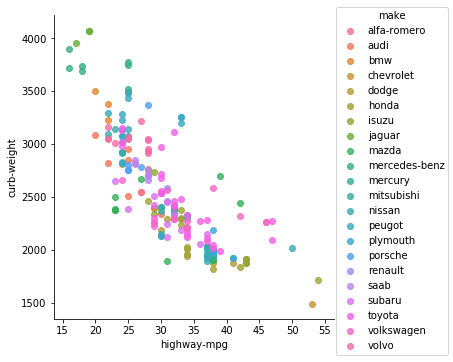

In [11]:
sns.lmplot('highway-mpg', 'curb-weight', data, hue='make',fit_reg=False)